In [1]:
# Import Packages
import pandas as pd
from PIL import Image
from pathlib import Path
import imagesize
import numpy as np
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
import tensorflow
print(tensorflow.__version__)

2.2.0


# Get optimal img_width and img_height

In [3]:
# Get all folder names

import os
path = "D:/University/4-2/Thesis/plantnet_300K/images_train"
dir_list = os.listdir(path)
 
print("Directories in '", path, "' :", dir_list[0:10])

Directories in ' D:/University/4-2/Thesis/plantnet_300K/images_train ' : ['1355868', '1355920', '1355932', '1355936', '1355937', '1355955', '1355959', '1355961', '1355978', '1355990']


In [4]:
len(dir_list)

1081

In [5]:
# Src: https://medium.com/analytics-vidhya/how-to-pick-the-optimal-image-size-for-training-convolution-neural-network-65702b880f05
# Identify Image Resolutions

imgs = []
# Get the Image Resolutions
for dirname in dir_list:
    imgs_temp = [img.name for img in Path('images_train/' + dirname).iterdir() if img.suffix in [".jpg", ".png", ".gif", ".webp", ".tiff", ".psd", ".raw", ".bmp", ".heif", ".indd", ".jpeg"]]
    imgs.append(imgs_temp)

In [6]:
len(imgs)

1081

In [24]:
# Obtain number of images in a folder(plant)
imgs_len_arr = [int(len(lst)) for lst in imgs ]
imgs_len_arr

[335,
 2,
 1716,
 3419,
 5178,
 14,
 160,
 7,
 891,
 1224,
 91,
 6140,
 15,
 4,
 1040,
 60,
 823,
 704,
 13,
 1379,
 131,
 7,
 5,
 9,
 38,
 1031,
 301,
 550,
 312,
 81,
 473,
 2007,
 292,
 3,
 84,
 4837,
 79,
 9,
 261,
 88,
 1291,
 127,
 571,
 27,
 18,
 292,
 1700,
 2468,
 24,
 20,
 63,
 79,
 4,
 79,
 620,
 184,
 92,
 8,
 8,
 64,
 1570,
 520,
 6,
 21,
 5,
 115,
 728,
 4,
 1359,
 8,
 16,
 4,
 111,
 247,
 106,
 11,
 43,
 48,
 133,
 13,
 15,
 65,
 10,
 661,
 4502,
 15,
 2,
 55,
 1534,
 24,
 21,
 23,
 428,
 2,
 26,
 3,
 10,
 327,
 648,
 163,
 723,
 10,
 35,
 185,
 1319,
 7,
 3,
 4,
 187,
 39,
 4,
 8,
 5063,
 67,
 168,
 8,
 7,
 3,
 329,
 8,
 31,
 47,
 2811,
 4285,
 234,
 744,
 903,
 5,
 21,
 5,
 5,
 90,
 113,
 23,
 7,
 677,
 15,
 33,
 233,
 240,
 730,
 661,
 3,
 98,
 794,
 4,
 170,
 25,
 486,
 103,
 15,
 2,
 1030,
 740,
 304,
 4,
 16,
 14,
 2,
 120,
 23,
 15,
 1503,
 10,
 113,
 217,
 359,
 103,
 104,
 10,
 168,
 710,
 2738,
 2739,
 243,
 242,
 125,
 8,
 12,
 26,
 8,
 934,
 31,
 7,
 139,
 31

In [7]:
img_meta = {}

counter = 0
for lst in imgs:
    for f in lst:
        img_meta[str(f)] = imagesize.get('images_train/' + dir_list[counter] + '/' + f)
    print(counter)
    counter += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [23]:
img_meta

{'01aca26dc4a0b0af7c55ecf84d8772179bf6fd6d.jpg': (437, 437),
 '02e21587e98ecdfd504805f98ce1b935c88b11a1.jpg': (600, 600),
 '02f87f45758a19947360d8ed65d86ee4fb29cf75.jpg': (506, 506),
 '04e2c907d67fe601a2f8b7ae845f57b90fd72f64.jpg': (600, 600),
 '0524c952228ac448ae6e6265cc24633e648eb7e6.jpg': (600, 600),
 '054b62735676984c341ae26fb8caf43441630893.jpg': (506, 506),
 '05557193a41425620fd21892c28b887679ee0c33.jpg': (600, 600),
 '0678004da211507cd44eb6f16b57ed5a39a8d756.jpg': (540, 540),
 '06abfabfdbdfcbae0e173ccf2edf2849420b0319.jpg': (506, 506),
 '070a2c6a5e02fb44edb5b7b5f4070cdb36c51bb2.jpg': (600, 600),
 '0775fc05d47bd768a920b9ce2575d79da1351053.jpg': (600, 600),
 '07a486f8b29c368496831ba55993d8d22a417815.jpg': (600, 600),
 '084fe5305e35e506c8dac01beeb877449a386fd4.jpg': (600, 600),
 '0865e0fa2dc2411764a8bb1adfd1ad35adeb342b.jpg': (506, 506),
 '09c825c2c357b192741f455efee1fb62ad28c3ae.jpg': (600, 600),
 '0a342112ddd74ee3ea7918c445e2133fb5b9454d.jpg': (506, 506),
 '0b6ac36aeaaec260a0ee3f

In [8]:
# Convert it to Dataframe and compute aspect ratio
img_meta_df = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns', inplace=False)
img_meta_df[["Width", "Height"]] = pd.DataFrame(img_meta_df["Size"].tolist(), index=img_meta_df.index)
img_meta_df["Aspect Ratio"] = round(img_meta_df["Width"] / img_meta_df["Height"], 2)

print(f'Total Nr of Images in the dataset: {len(img_meta_df)}')
img_meta_df.head()

Total Nr of Images in the dataset: 243916


,FileName,Size,Width,Height,Aspect Ratio
0,01aca26dc4a0b0af7c55ecf84d8772179bf6fd6d.jpg,"(437, 437)",437,437,1.0
1,02e21587e98ecdfd504805f98ce1b935c88b11a1.jpg,"(600, 600)",600,600,1.0
2,02f87f45758a19947360d8ed65d86ee4fb29cf75.jpg,"(506, 506)",506,506,1.0
3,04e2c907d67fe601a2f8b7ae845f57b90fd72f64.jpg,"(600, 600)",600,600,1.0
4,0524c952228ac448ae6e6265cc24633e648eb7e6.jpg,"(600, 600)",600,600,1.0


In [96]:
plant_id = []

counter = 0
for i in imgs_len_arr:
    for j in range(int(i)):
        plant_id.append(dir_list[counter])
    counter += 1

plant_id

['1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '1355868',
 '13

In [102]:
img_meta_df.insert(0, 'plant_id', plant_id)
img_meta_df

,plant_id,FileName,Size,Width,Height,Aspect Ratio
0,1355868,01aca26dc4a0b0af7c55ecf84d8772179bf6fd6d.jpg,"(437, 437)",437,437,1.0
1,1355868,02e21587e98ecdfd504805f98ce1b935c88b11a1.jpg,"(600, 600)",600,600,1.0
2,1355868,02f87f45758a19947360d8ed65d86ee4fb29cf75.jpg,"(506, 506)",506,506,1.0
3,1355868,04e2c907d67fe601a2f8b7ae845f57b90fd72f64.jpg,"(600, 600)",600,600,1.0
4,1355868,0524c952228ac448ae6e6265cc24633e648eb7e6.jpg,"(600, 600)",600,600,1.0
...,...,...,...,...,...,...
243911,1717570,816c9f6f73c24659e42c2060a1841498a686fee9.jpg,"(600, 600)",600,600,1.0
243912,1717570,c486ad91d50dd28aeb757640f82caccf5c6fb716.jpg,"(600, 600)",600,600,1.0
243913,1717570,eba0f0a88828113f2a1032746a95225f6cb3ac48.jpg,"(600, 600)",600,600,1.0
243914,1718287,25ade30658ab7fcb4b4d734011a9baf387c930fd.jpg,"(600, 600)",600,600,1.0


In [12]:
img_meta_df.to_csv('csv/imgs_metadata.csv')

Text(0, 0.5, 'Height')

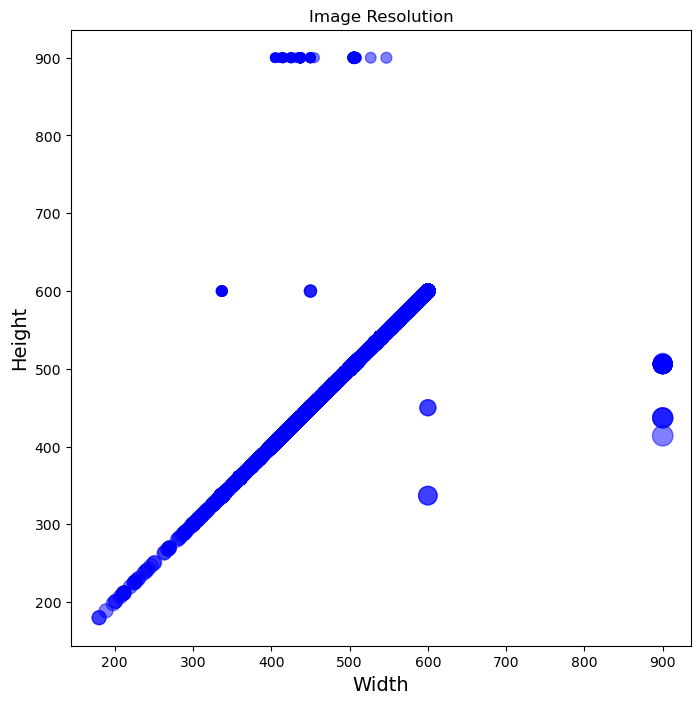

In [4]:
# Visualize Image Resolutions

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
points = ax.scatter(img_meta_df.Width, img_meta_df.Height, color='blue', alpha=0.5, s=img_meta_df["Aspect Ratio"]*100, picker=True)
ax.set_title("Image Resolution")
ax.set_xlabel("Width", size=14)
ax.set_ylabel("Height", size=14)

# Preprocessing

In [3]:
img_meta_df = pd.read_csv('csv/imgs_metadata.csv')

In [4]:
image_size = tuple((400, 400))
width, height = 400, 400
depth = 3

train_data_dir = r"/images_train"
test_data_dir = r"/images_test"

nb_train_sample = 100
nb_test_sample = 100

EPOCHS = 20
BATCH_SIZE = 20

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.set_visible_devices(gpus[0], 'GPU')

print(gpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [6]:
image_directory_list = []
filename_list = img_meta_df['FileName'].tolist()
corresponding_foldername_list = img_meta_df['plant_id'].tolist()

for idx,i in enumerate(filename_list):
    image_directory_list.append(f"images_train/{corresponding_foldername_list[idx]}/{i}")

image_directory_list

['images_train/1355868/01aca26dc4a0b0af7c55ecf84d8772179bf6fd6d.jpg',
 'images_train/1355868/02e21587e98ecdfd504805f98ce1b935c88b11a1.jpg',
 'images_train/1355868/02f87f45758a19947360d8ed65d86ee4fb29cf75.jpg',
 'images_train/1355868/04e2c907d67fe601a2f8b7ae845f57b90fd72f64.jpg',
 'images_train/1355868/0524c952228ac448ae6e6265cc24633e648eb7e6.jpg',
 'images_train/1355868/054b62735676984c341ae26fb8caf43441630893.jpg',
 'images_train/1355868/05557193a41425620fd21892c28b887679ee0c33.jpg',
 'images_train/1355868/0678004da211507cd44eb6f16b57ed5a39a8d756.jpg',
 'images_train/1355868/06abfabfdbdfcbae0e173ccf2edf2849420b0319.jpg',
 'images_train/1355868/070a2c6a5e02fb44edb5b7b5f4070cdb36c51bb2.jpg',
 'images_train/1355868/0775fc05d47bd768a920b9ce2575d79da1351053.jpg',
 'images_train/1355868/07a486f8b29c368496831ba55993d8d22a417815.jpg',
 'images_train/1355868/084fe5305e35e506c8dac01beeb877449a386fd4.jpg',
 'images_train/1355868/0865e0fa2dc2411764a8bb1adfd1ad35adeb342b.jpg',
 'images_train/13558

In [7]:
train_datagen = ImageDataGenerator(zoom_range = 0.5, 
                                   shear_range = 0.3, 
                                   horizontal_flip = True, 
                                   preprocessing_function = preprocess_input)

test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

In [8]:
train = train_datagen.flow_from_directory(directory = 'images_train', 
                                          target_size = (400, 400), 
                                          batch_size = 32)

test = train_datagen.flow_from_directory(directory = 'images_test', 
                                          target_size = (400, 400), 
                                          batch_size = 32)

Found 243919 images belonging to 1081 classes.
Found 31112 images belonging to 1081 classes.


In [9]:
t_img, label = train.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


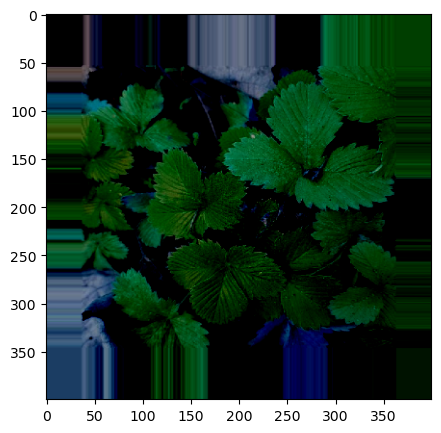

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


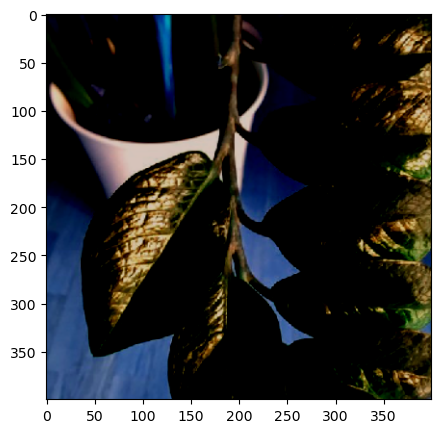

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


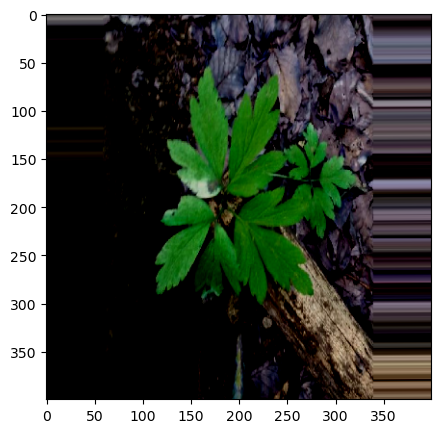

In [10]:
def plotImage(img_arr, label):
    for im,l in zip(img_arr, label):
        plt.figure(figsize = (5,5))
        plt.imshow(im/180)
        plt.show()
        
        
plotImage(t_img[:3], label[:3])

# Model

In [11]:
import h5py
base_model = VGG19(input_shape=(400,400,3), include_top = False)

In [12]:
for layer in base_model.layers:
    layer.trainable = False

In [13]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 400, 400, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 400, 400, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 400, 400, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 200, 200, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 200, 200, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 200, 200, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 100, 100, 128)     0     

In [14]:
X = Flatten()(base_model.output)
X = Dense(units = 1081, activation='softmax')(X)

model = Model(base_model.input, X)

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 400, 400, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 400, 400, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 400, 400, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 200, 200, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 200, 200, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 200, 200, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 100, 100, 128)     0     

In [16]:
model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])

# Checkpoint

In [28]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor = 'test_accuracy', min_delta=0.01, patience = 3, verbose = 1)

mc = ModelCheckpoint(filepath = 'models/best_model.h5', 
                     monitor = 'accuracy', 
                     min_delta=0.01, 
                     patience = 3, 
                     verbose = 1, 
                     save_best_only = True)

cb = [es, mc]

In [29]:
his = model.fit_generator(train,
                          steps_per_epoch = 10, 
                          epochs = 100, 
                          verbose = 1, 
                          callbacks = cb, 
                          validation_data = test, 
                          validation_steps = 16)


Epoch 1/100
10/10 [==============================] - ETA: 0s - loss: 130.4629 - accuracy: 0.2937WARNING:tensorflow:Early stopping conditioned on metric `test_accuracy` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy

Epoch 00001: accuracy improved from -inf to 0.29375, saving model to models/best_model.h5
10/10 [==============================] - 94s 9s/step - loss: 130.4629 - accuracy: 0.2937 - val_loss: 133.5882 - val_accuracy: 0.2539
Epoch 2/100
10/10 [==============================] - ETA: 0s - loss: 113.9873 - accuracy: 0.2844WARNING:tensorflow:Early stopping conditioned on metric `test_accuracy` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy

Epoch 00002: accuracy did not improve from 0.29375
10/10 [==============================] - 63s 6s/step - loss: 113.9873 - accuracy: 0.2844 - val_loss: 145.6913 - val_accuracy: 0.2500
Epoch 3/100
10/10 [==============================] - ETA: 0s - loss: 138.2662 - accuracy:

In [19]:
h = his.history
h.keys()

NameError: name 'his' is not defined

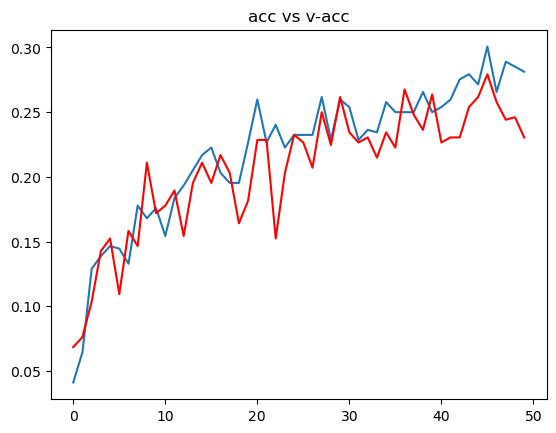

In [22]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = "red")
plt.title('acc vs v-acc')
plt.show()

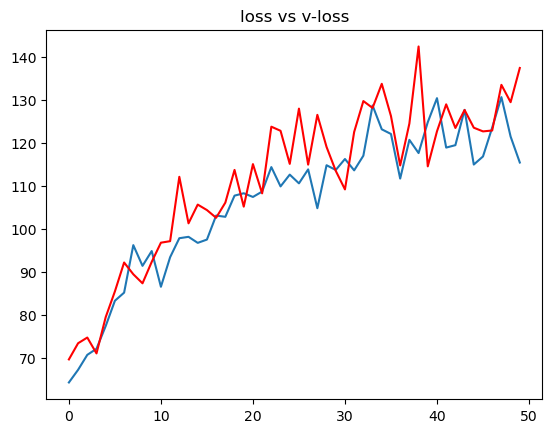

In [35]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = "red")
plt.title('loss vs v-loss')
plt.show()

In [17]:
# best model

from tensorflow.keras.models import load_model

model = load_model('models/best_model.h5')

In [21]:
acc = model.evaluate(test)[1]

Instructions for updating:
Please use Model.evaluate, which supports generators.


KeyboardInterrupt: 

In [18]:
def prediction(path):
    img = load_img(path, target_size=(400, 400))
    i = img_to_array(img)
    im = preprocess_input(i)
    img = np.expand_dims(im, axis = 0)
    pred = np.argmax(model.predict(img))
    print(pred)

In [19]:
path = 'images_val/1355868/07d216920109c97a40e32588418bf24bde030b60.jpg'

prediction(path)

248


In [28]:
train.class_indices

{'1355868': 0,
 '1355920': 1,
 '1355932': 2,
 '1355936': 3,
 '1355937': 4,
 '1355955': 5,
 '1355959': 6,
 '1355961': 7,
 '1355978': 8,
 '1355990': 9,
 '1356003': 10,
 '1356022': 11,
 '1356037': 12,
 '1356055': 13,
 '1356075': 14,
 '1356076': 15,
 '1356111': 16,
 '1356126': 17,
 '1356138': 18,
 '1356257': 19,
 '1356278': 20,
 '1356279': 21,
 '1356309': 22,
 '1356379': 23,
 '1356380': 24,
 '1356382': 25,
 '1356420': 26,
 '1356421': 27,
 '1356428': 28,
 '1356469': 29,
 '1356692': 30,
 '1356781': 31,
 '1356816': 32,
 '1356847': 33,
 '1356901': 34,
 '1357330': 35,
 '1357331': 36,
 '1357367': 37,
 '1357379': 38,
 '1357506': 39,
 '1357635': 40,
 '1357652': 41,
 '1357677': 42,
 '1357681': 43,
 '1357682': 44,
 '1357705': 45,
 '1358094': 46,
 '1358095': 47,
 '1358096': 48,
 '1358097': 49,
 '1358099': 50,
 '1358101': 51,
 '1358102': 52,
 '1358103': 53,
 '1358105': 54,
 '1358108': 55,
 '1358112': 56,
 '1358119': 57,
 '1358127': 58,
 '1358132': 59,
 '1358133': 60,
 '1358150': 61,
 '1358193': 62,
 '